In [1]:
!python --version 

Python 3.7.1


In [33]:
import pybrain 
from pybrain.structure import FeedForwardNetwork
from pybrain.structure import LinearLayer, SigmoidLayer, SoftmaxLayer, BiasUnit
from pybrain.structure import FullConnection
from sklearn import datasets
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
import numpy as np
#hidden layer --> Sigmoid Layer 
#output layer --> Softmax Layer

In [34]:
network = FeedForwardNetwork()
input_layer_iris  = LinearLayer(4)
hidden_layer_iris = SigmoidLayer(4)
output_layer_iris = SoftmaxLayer(3)
bias0_iris = BiasUnit()
bias1_iris = BiasUnit()

In [21]:
input_to_hidden_iris = FullConnection(input_layer_iris, hidden_layer_iris)
hidden_to_output_iris = FullConnection(hidden_layer_iris, output_layer_iris)
bias_hidden_iris = FullConnection(bias0_iris, hidden_layer_iris)
bias_output_iris = FullConnection(bias1_iris, output_layer_iris)
network.addModule(input_layer_iris)
network.addModule(hidden_layer_iris)
network.addModule(output_layer_iris)
network.addModule(bias0_iris)
network.addModule(bias1_iris)

In [29]:
network.sortModules()

In [30]:
print(network)

FeedForwardNetwork-37
   Modules:
    [<BiasUnit 'BiasUnit-32'>, <BiasUnit 'BiasUnit-33'>, <LinearLayer 'LinearLayer-34'>, <SigmoidLayer 'SigmoidLayer-36'>, <SoftmaxLayer 'SoftmaxLayer-35'>]
   Connections:
    []



In [31]:
#loading dataset for pybrain to train 
iris = datasets.load_iris()
X, Y = iris.data, iris.target

#one hot encoding 
Y_one_hot = np.zeros((Y.size, 3))  
Y_one_hot[np.arange(Y.size), Y] = 1

dataset_iris = SupervisedDataSet(4, 3)
for i in range(len(X)):
    dataset_iris.addSample(X[i], Y_one_hot[i])
    
print(f"Dataset input size: {dataset_iris.indim}, output size: {dataset_iris.outdim}")

Dataset input size: 4, output size: 3


In [27]:
#training the pybrain model
from pybrain.supervised.trainers import BackpropTrainer

trainer = BackpropTrainer(network, dataset=dataset_iris, learningrate=0.01, momentum=0.9, verbose=True)

epochs = 10000
for epoch in range(epochs):
    error = trainer.train()
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {error}")


AssertionError: 

In [43]:
import numpy as np
from sklearn import datasets
from pybrain.tools.shortcuts import buildNetwork
from sklearn import datasets
from pybrain.datasets import SupervisedDataSet
from pybrain.structure import FeedForwardNetwork, LinearLayer, SigmoidLayer, SoftmaxLayer, FullConnection, BiasUnit
from pybrain.supervised.trainers import BackpropTrainer

# Load Iris dataset
iris = datasets.load_iris()
inputs = iris.data
outputs = iris.target
# Initialize FeedForward Neural Network
network = buildNetwork(4, 4, 4, 3, outclass = SoftmaxLayer, hiddenclass = SigmoidLayer, bias = False)

dataset = SupervisedDataSet(4,3)
for i in range(len(inputs)):
  if outputs[i] == 0:
    output = (1, 0, 0, )
  elif outputs[i] == 1:
    output = (0, 1, 0,)
  else:
    output = (0, 0, 1, )
  dataset.addSample((inputs[i][0], inputs[i][1], inputs[i][2], inputs[i][3]), output)

dataset['target']



array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [42]:
network['out']

<SoftmaxLayer 'out'>

In [44]:
optimizer = BackpropTrainer(module=network, dataset=dataset, learningrate=0.01)

In [47]:
epochs = 10000
error = []
for epoch in range(epochs):
  error_average = optimizer.train()
  if epoch % 500 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(error_average))
    error.append(error_average)
    
    
#stopped midway as minimum error has been found 

Epoch: 1 Error: 0.0029517345716531633
Epoch: 1001 Error: 0.0029976706863913396


KeyboardInterrupt: 

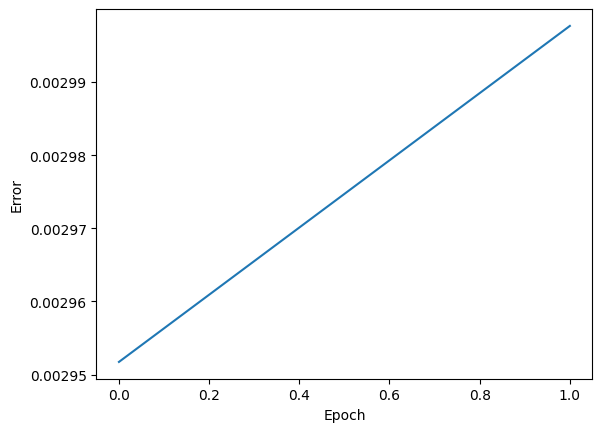

In [48]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.plot(error)
